In [31]:
from app.utils.constant import IMAGE_STORE_NAME
from pdf2image import convert_from_path
import os
import re
import logging

In [3]:
def conversion_pdf_to_image(pdf_path:str,path_store:str)->None:
    if not os.path.exists(path_store):
        os.makedirs(path_store,)
    # poppler_path = r'C:\Users\Admin\Desktop\nRoad\Merchant_Statement\Merchant_Statement_Code_V1\Merchant_Statement_Code\poppler-0.68.0\bin'
    # images = convert_from_path(pdf_path, 300,poppler_path=poppler_path)
    images = convert_from_path(pdf_path, 300)
    for i, image in enumerate(images):
        fname = os.path.join(path_store,'image'+str(i)+'.jpeg')
        image.save(fname, "JPEG")

In [4]:
def calling_conversion(pdf_path:str)->str:
    # pdf_path = r'C:\Users\Admin\Downloads\Annual-Report-Template.pdf'
    pdf_name = re.sub('\.pdf','',os.path.split(pdf_path)[-1])
    pdf_image_path_fld = os.path.join(IMAGE_STORE_NAME,pdf_name,'images')
    if not os.path.exists(pdf_image_path_fld):
        os.makedirs(pdf_image_path_fld,exist_ok=True)
    conversion_pdf_to_image(pdf_path=pdf_path,path_store=pdf_image_path_fld)
    logging.info(f"Converted Images Stored at : {pdf_image_path_fld}")
    return pdf_image_path_fld

In [6]:
calling_conversion(pdf_path = r'/Users/bhairavjain/Desktop/building_object_detection_module/Annual-Report-Template.pdf')

'pdf_ouptut/Annual-Report-Template/images'

In [8]:
from app.utils.constant import IMAGE_STORE_NAME
from app.utils.constant import PREDICT_IMAGE_STORE
import os
import numpy as np
from ultralyticsplus import YOLO, render_result
from PIL import Image

In [36]:
# load model
model = YOLO('keremberke/yolov8m-table-extraction')
# model = YOLO('yolov8n.pt')

In [37]:
# set model parameters
model.overrides['conf'] = 0.25  # NMS confidence threshold
model.overrides['iou'] = 0.45  # NMS IoU threshold
model.overrides['agnostic_nms'] = False  # NMS class-agnostic
model.overrides['max_det'] = 1000  # maximum number of detections per image

In [38]:
images_path = 'pdf_ouptut/Annual-Report-Template/images'
predict_table_path = images_path.replace('images',PREDICT_IMAGE_STORE)
for images_list in os.listdir(images_path):
    print("Images --> ",images_list)
    predict_fld_path = os.path.join(predict_table_path,images_list.replace('.jpeg',''))
    if not os.path.exists(predict_fld_path):
        os.makedirs(predict_fld_path)
    image = 'pdf_ouptut/Annual-Report-Template/images/'+images_list
    print("Images --> ",image)
    img = Image.open(image)

    # perform inference
    results = model.predict(img)

    print("Number of Table Predicted -- ",len(results[0].boxes.data.numpy()))

    for idx,_ in enumerate(results[0].boxes.data.numpy()):
        x1, y1, x2, y2, _, _ = tuple(int(item) for item in results[0].boxes.data.numpy()[idx])
        img = np.array(Image.open(image))

        cropped_image = img[y1:y2, x1:x2]
        cropped_image = Image.fromarray(cropped_image)
        file_name = os.path.join(predict_fld_path,'predict_table_'+str(idx+1)+'.jpeg')
        cropped_image.save(file_name)
    

Images -->  image0.jpeg
Images -->  pdf_ouptut/Annual-Report-Template/images/image0.jpeg

0: 640x512 1 bordered, 1 borderless, 200.1ms
Speed: 2.1ms preprocess, 200.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 512)
Number of Table Predicted --  2
Images -->  image1.jpeg
Images -->  pdf_ouptut/Annual-Report-Template/images/image1.jpeg

0: 640x512 3 bordereds, 186.6ms
Speed: 1.8ms preprocess, 186.6ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 512)
Number of Table Predicted --  3
Images -->  image2.jpeg
Images -->  pdf_ouptut/Annual-Report-Template/images/image2.jpeg

0: 640x512 2 bordereds, 1 borderless, 181.0ms
Speed: 1.7ms preprocess, 181.0ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 512)
Number of Table Predicted --  3
Images -->  image3.jpeg
Images -->  pdf_ouptut/Annual-Report-Template/images/image3.jpeg

0: 640x512 1 bordered, 183.8ms
Speed: 1.8ms preprocess, 183.8ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 512

In [15]:
images_path = 'pdf_ouptut/Annual-Report-Template/images'

images_list = os.listdir(images_path)

images_list[0]

'image0.jpeg'

In [25]:
predict_table_path = images_path.replace('images',PREDICT_IMAGE_STORE)
os.path.join(predict_table_path,images_list[0].replace('.jpeg',''))

'pdf_ouptut/Annual-Report-Template/predict_table_output/image0'

In [22]:
image = r'pdf_ouptut/Annual-Report-Template/images/'+images_list[0]

img = Image.open(image)

# perform inference
results = model.predict(img)

print("Number of Table Predicted -- ",len(results[0].boxes.data.numpy()))


0: 640x512 1 laptop, 55.7ms
Speed: 2.5ms preprocess, 55.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 512)
Number of Table Predicted --  1


In [23]:
for idx,_ in enumerate(results[0].boxes.data.numpy()):
    x1, y1, x2, y2, _, _ = tuple(int(item) for item in results[0].boxes.data.numpy()[idx])
    img = np.array(Image.open(image))

    cropped_image = img[y1:y2, x1:x2]
    cropped_image = Image.fromarray(cropped_image)
    cropped_image.save()

TypeError: Image.save() missing 1 required positional argument: 'fp'

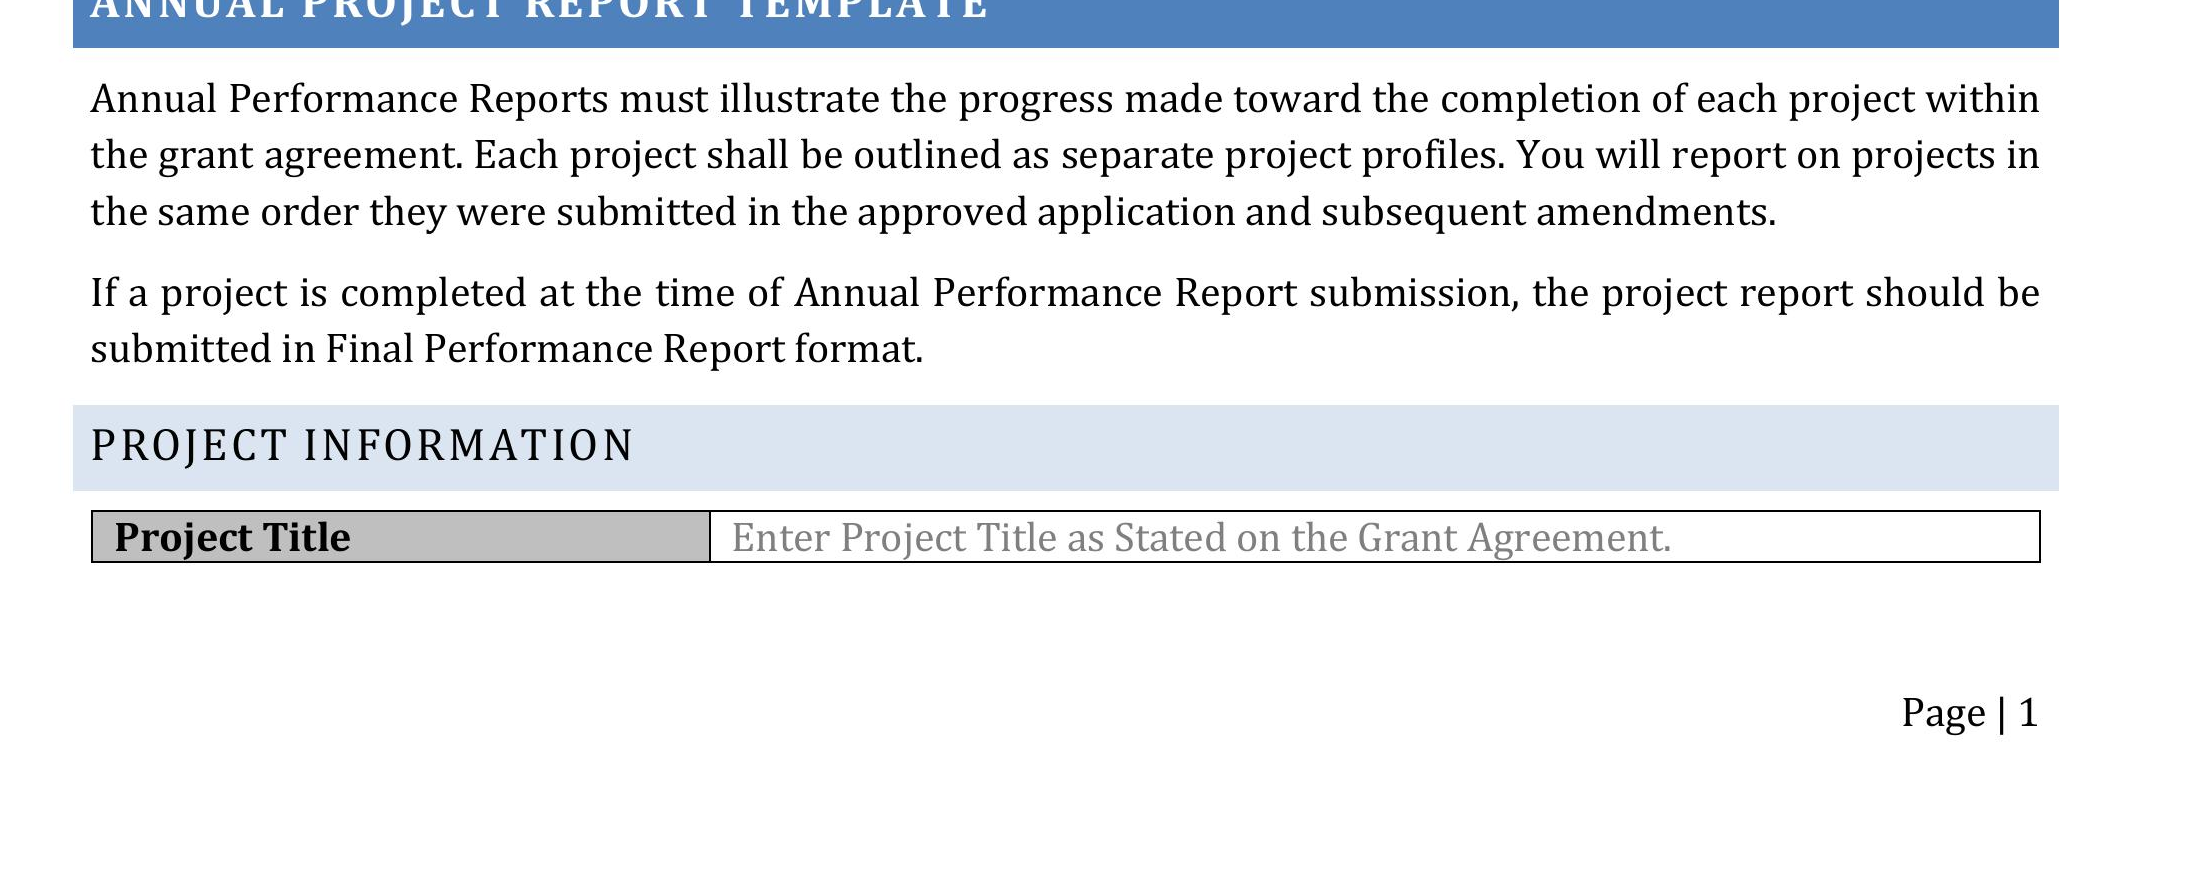

In [21]:
x1, y1, x2, y2, _, _ = tuple(int(item) for item in results[0].boxes.data.numpy()[0])
img = np.array(Image.open(image))
#cropping
cropped_image = img[y1:y2, x1:x2]
cropped_image = Image.fromarray(cropped_image)
cropped_image.save()

In [5]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# import pytesseract
# from pytesseract import Output

from ultralyticsplus import YOLO, render_result
from PIL import Image



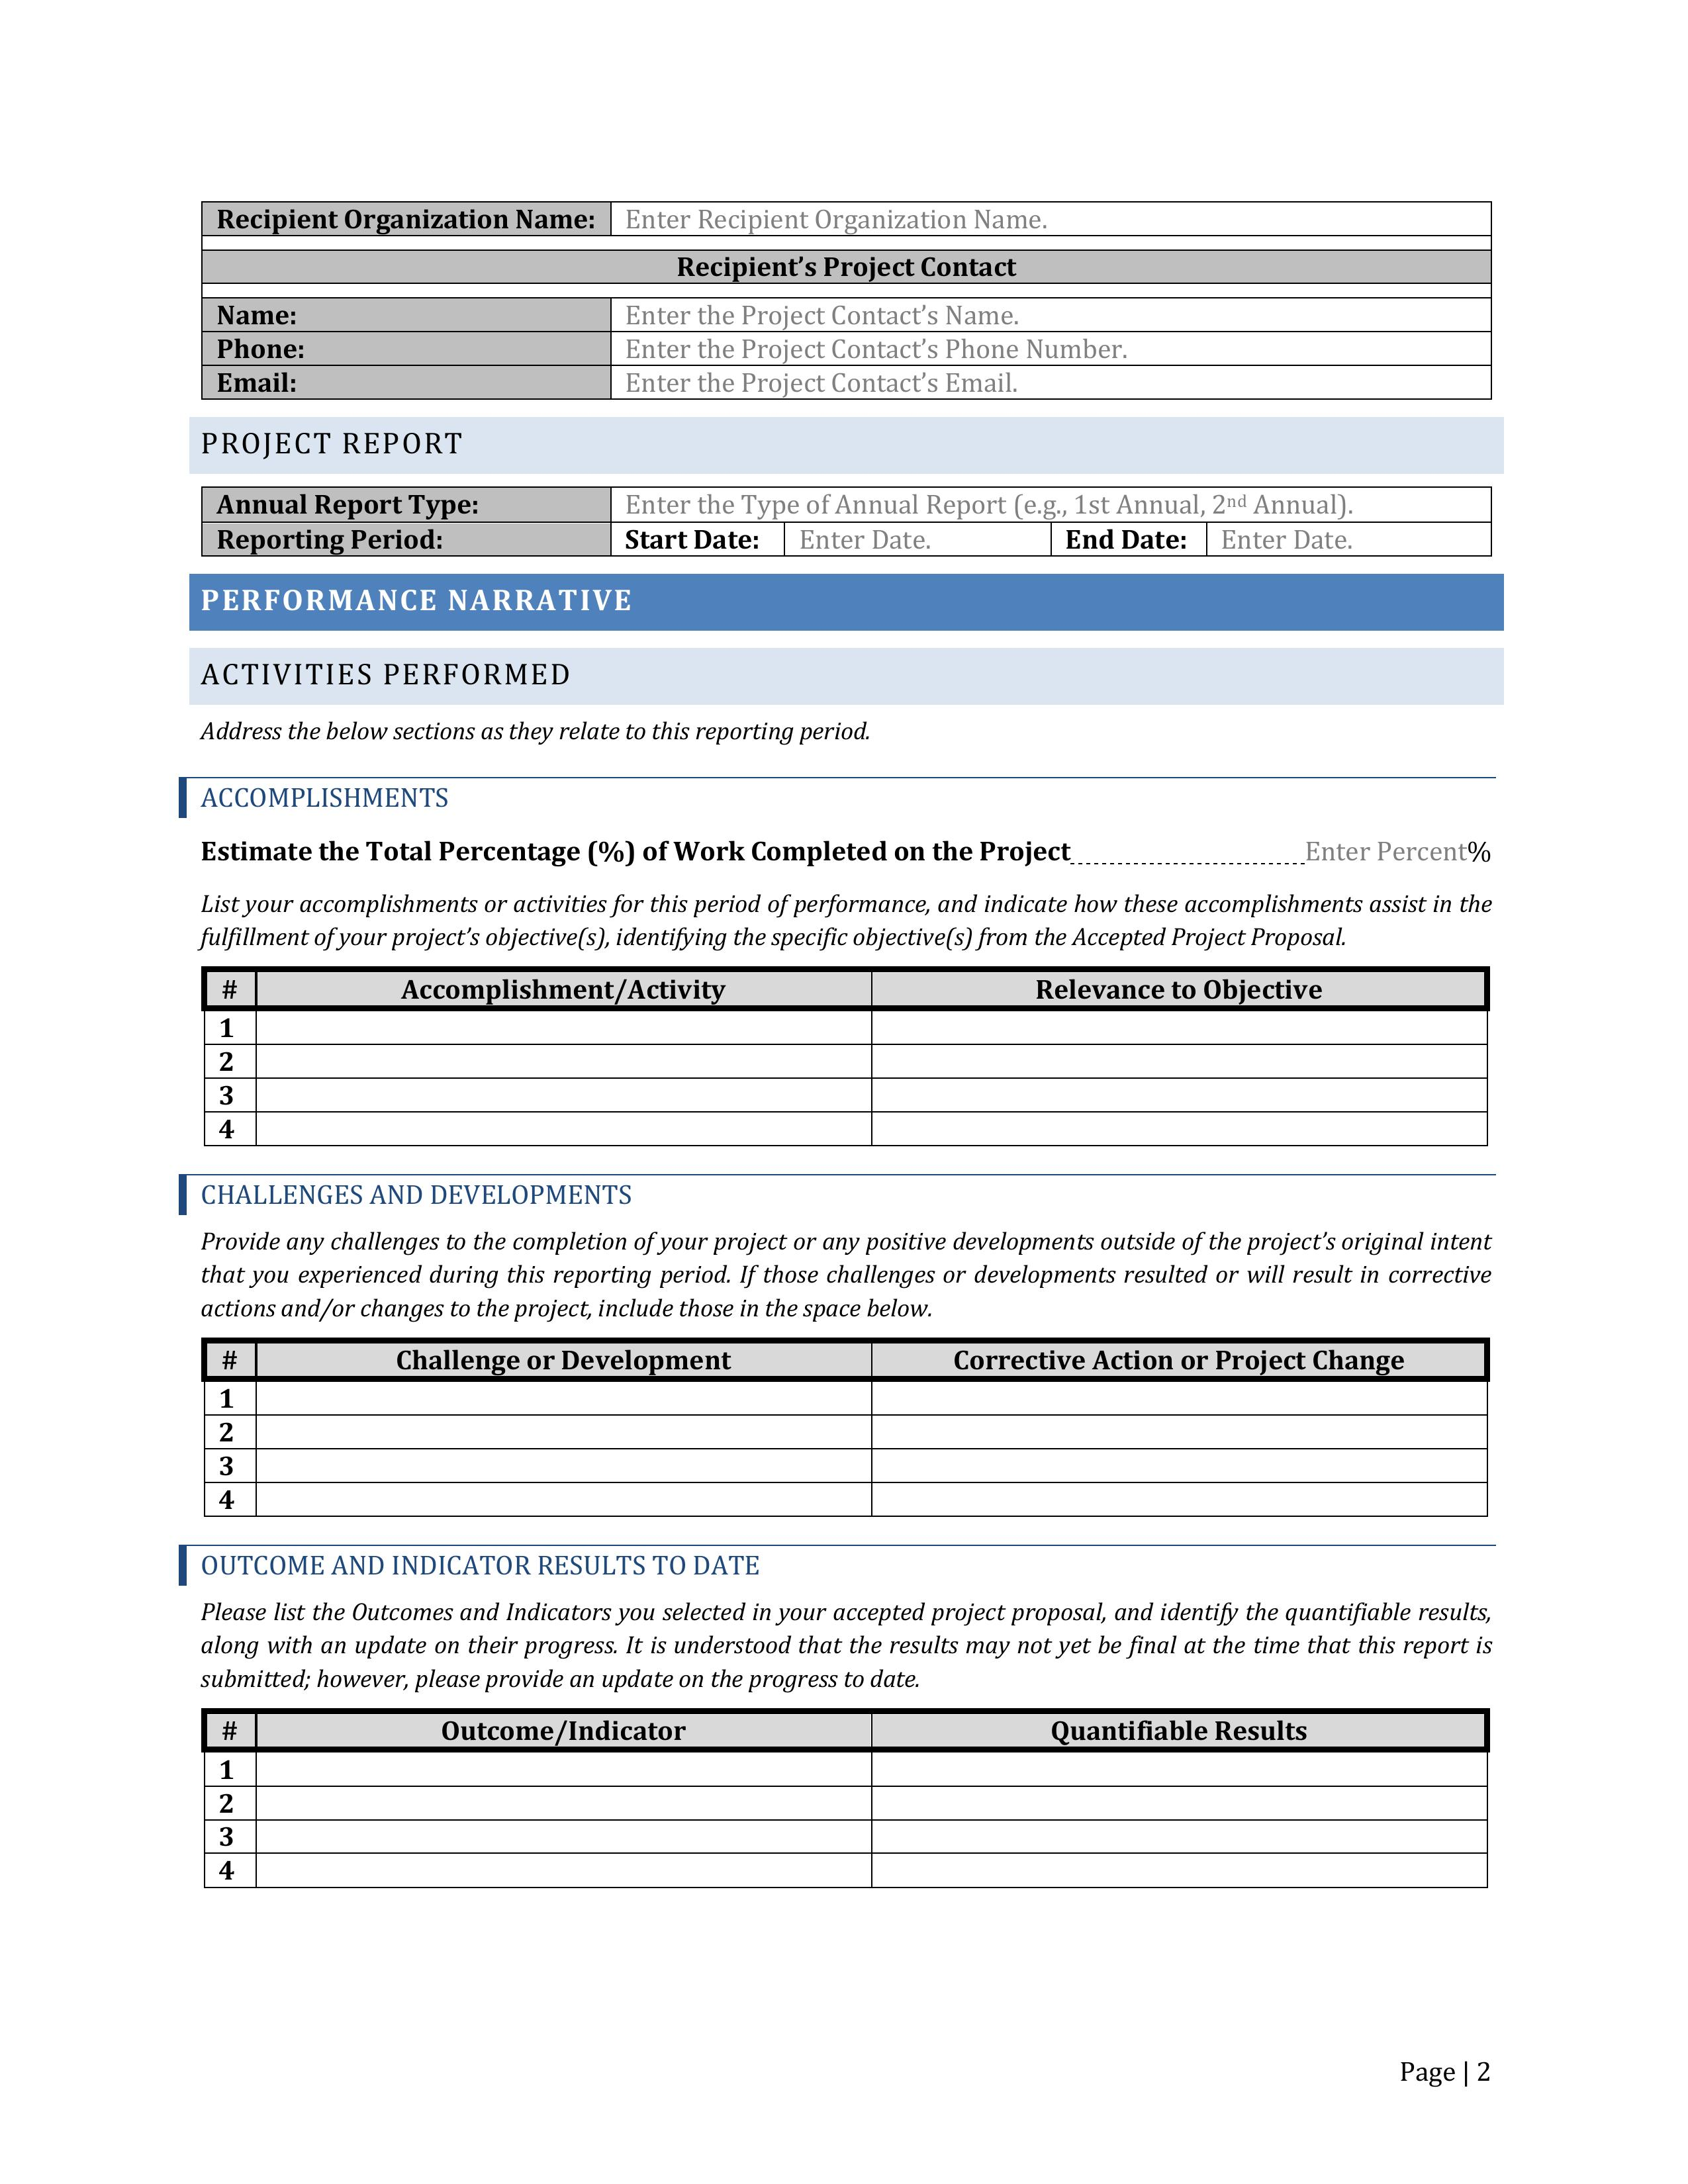

In [30]:
## Image downloaded from below link
# https://stackoverflow.com/questions/50829874/how-to-find-table-like-structure-in-image

image = r'pdf_ouptut/Annual-Report-Template/images/image1.jpeg'

img = Image.open(image)
img

In [31]:
# load model
model = YOLO('keremberke/yolov8m-table-extraction')

/Users/bhairavjain/Desktop/building_object_detection_module/venv_pdf_object/lib/python3.11/site-packages/ultralytics/nn/tasks.py:634: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feat

In [32]:
# set model parameters
model.overrides['conf'] = 0.25  # NMS confidence threshold
model.overrides['iou'] = 0.45  # NMS IoU threshold
model.overrides['agnostic_nms'] = False  # NMS class-agnostic
model.overrides['max_det'] = 1000  # maximum number of detections per image

In [33]:
# perform inference
results = model.predict(img)

# observe results
# print('Boxes: ', results[0].boxes)
# render = render_result(model=model, image=img, result=results[0])
# render


0: 640x512 3 bordereds, 204.6ms
Speed: 2.4ms preprocess, 204.6ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 512)


In [34]:
results[0].boxes.data.numpy()

array([[     296.23,      2008.9,      2249.3,      2290.9,     0.87868,           0],
       [     284.37,      1465.7,      2250.9,      1743.3,     0.73714,           0],
       [     301.87,      2570.8,      2246.6,      2860.1,     0.65211,           0]], dtype=float32)

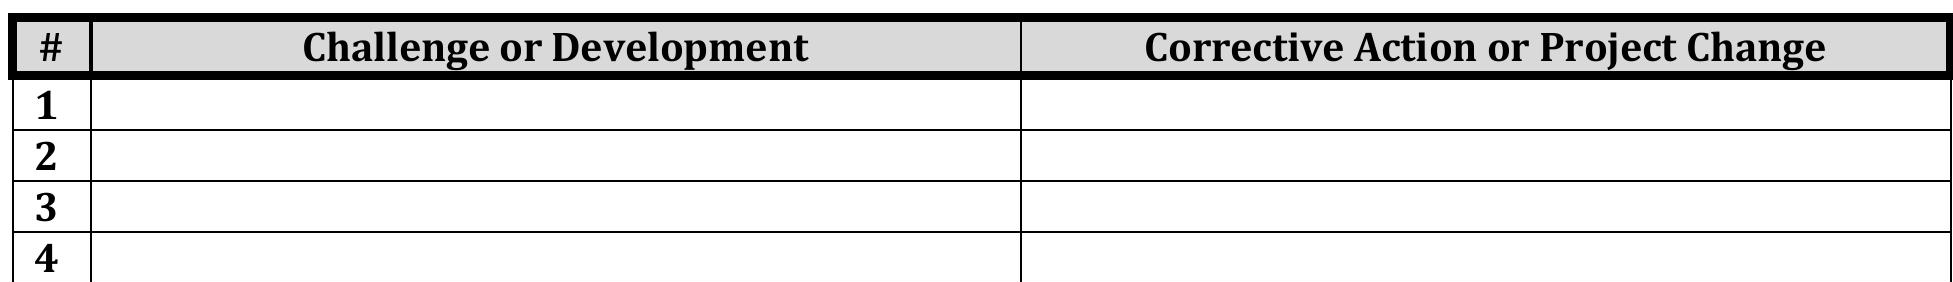

In [35]:
x1, y1, x2, y2, _, _ = tuple(int(item) for item in results[0].boxes.data.numpy()[0])
img = np.array(Image.open(image))
#cropping
cropped_image = img[y1:y2, x1:x2]
cropped_image = Image.fromarray(cropped_image)
cropped_image

In [2]:
from PIL import Image
import pytesseract
from pytesseract import Output

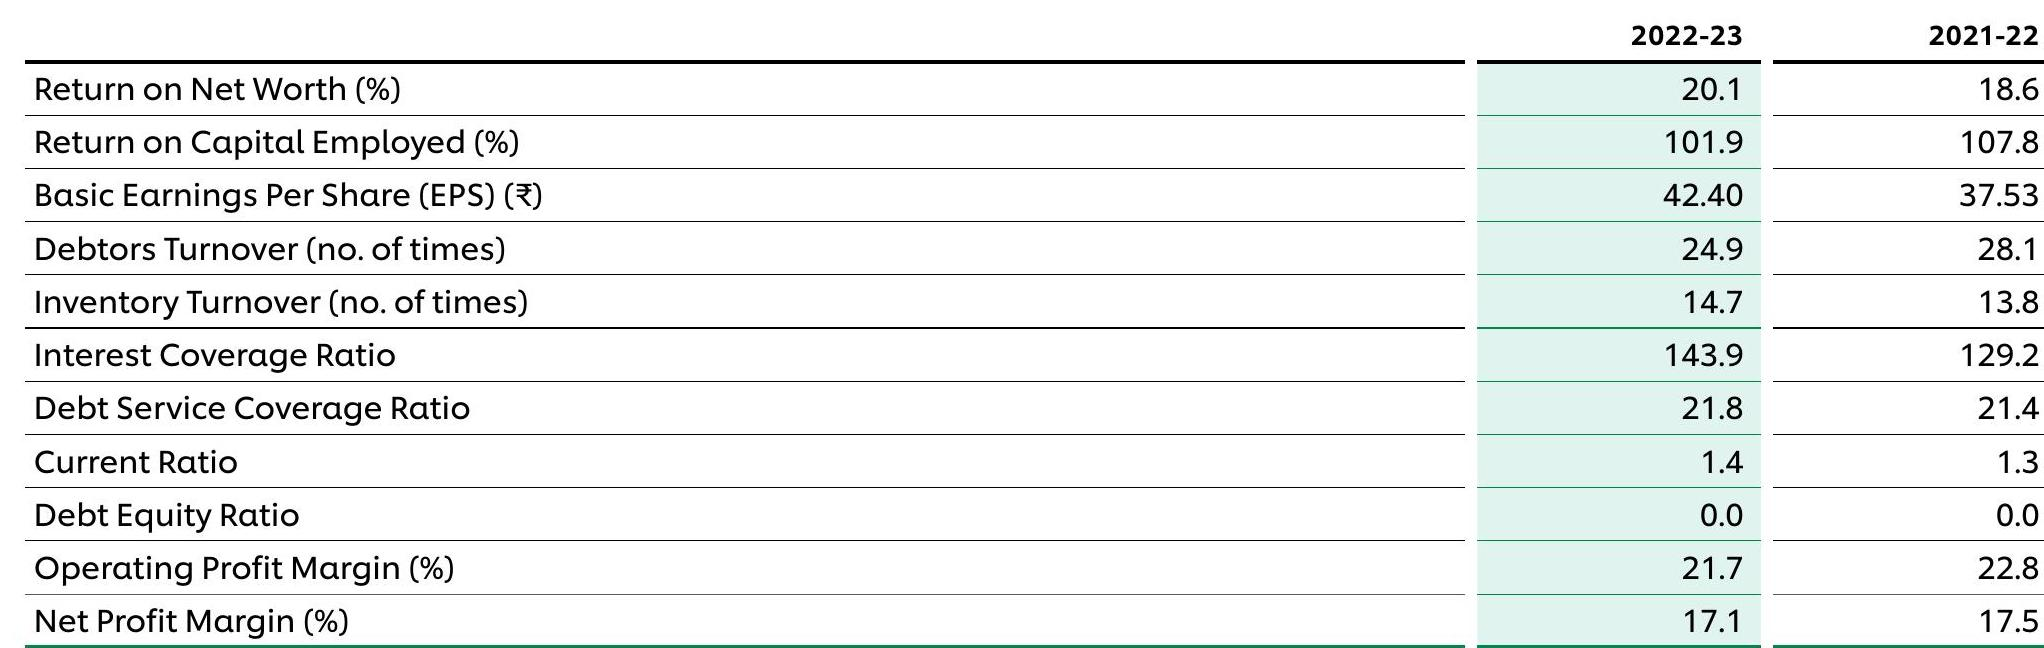

In [3]:
cropped_image = Image.open('/Users/bhairavjain/Desktop/building_object_detection_module/pdf_query_document/pdf_ouptut/Annual_Report___2022_23__2__bWICfx_87/predict_table_output/image0.jpg/predict_table_1.jpeg')

cropped_image

In [6]:
ext_df = pytesseract.image_to_data(cropped_image, output_type=Output.DATAFRAME, config="--psm 6")


In [11]:
ext_df = ext_df[ext_df['level']==5]

ext_df.head(25)


level  page_num  block_num  par_num  line_num  word_num  left  top  width  \
4       5         1          1        1         1         1  1632   25    109   
5       5         1          1        1         1         2  1930   25    108   
7       5         1          1        1         2         1    36   78     97   
8       5         1          1        1         2         2   144   83     37   
9       5         1          1        1         2         3   193   78     52   
10      5         1          1        1         2         4   253   76     92   
11      5         1          1        1         2         5   357   77     42   
12      5         1          1        1         2         6  1683   72     54   
13      5         1          1        1         2         7  1981   77     57   
15      5         1          1        1         3         1    36  131     97   
16      5         1          1        1         3         2   144  136     37   
17      5         1          1        1         3         3   192  129    112   
18      5         1          1        1         3         4   314  129    150   
19      5         1          1        1         3         5   475  130     43   
20      5         1          1        1         3         6  1666  130     76   
21      5         1          1        1         3         7  1962  130     76   
23      5         1          1        1         4         1    36  183     77   
24      5         1          1        1         4         2   124  183    132   
25      5         1          1        1         4         3   268  184     46   
26      5         1          1        1         4         4   323  182     87   
27      5         1          1        1         4         5   420  183     74   
28      5         1          1        1         4         6   505  182     36   
29      5         1          1        1         4         7  1664  183     78   
30      5         1          1        1         4         8  1960  183     78   
32      5         1          1        1         5         1    36  236    119   

    height       conf      text  
4       20  96.770958   2022-23  
5       20  96.269852   2021-22  
7       22  96.321114    Return  
8       17  96.381218        on  
9       22  96.084785       Net  
10      24  93.291634     Worth  
11      27  92.798996       (%)  
12      36  96.926353      20.1  
13      23  96.263153      18.6  
15      22  96.415497    Return  
16      17  95.841324        on  
17      31  95.097542   Capital  
18      31  92.572983  Employed  
19      27  92.572983       (%)  
20      23  96.070885     101.9  
21      23  95.444626     107.8  
23      23  96.252686     Basic  
24      30  96.252686  Earnings  
25      22  96.452682       Per  
26      24  96.452682     Share  
27      27  95.487106     (EPS)  
28      28  88.255577       (2)  
29      23  96.419876     42.40  
30      23  82.044769      3753  
32      24  96.209900   Debtors

In [12]:
ext_df.columns

Index(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num',
       'left', 'top', 'width', 'height', 'conf', 'text'],
      dtype='object')

In [13]:
sub_ext_df = ext_df[['left', 'top', 'width', 'height', 'text']]

sub_ext_df

left  top  width  height     text
4   1632   25    109      20  2022-23
5   1930   25    108      20  2021-22
7     36   78     97      22   Return
8    144   83     37      17       on
9    193   78     52      22      Net
..   ...  ...    ...     ...      ...
80    99  608     78      24   Profit
81   187  609    106      30   Margin
82   305  609     42      27      (%)
83  1685  609     52      23      A7A
84  1981  610     57      22      175

[70 rows x 5 columns]

In [14]:
left_list = sub_ext_df['left'].tolist()
top_list = sub_ext_df['top'].tolist()
width_list = sub_ext_df['width'].tolist()
height_list = sub_ext_df['height'].tolist()
text_list = sub_ext_df['text'].tolist()

word_dict = []

for idx,_ in enumerate(left_list):
    temp = {
            'bbox' : [left_list[idx],top_list[idx],width_list[idx],height_list[idx]],
            'text' : text_list[idx]
    }
    word_dict.append(temp)

In [15]:
word_dict = []

for idx,_ in enumerate(left_list):
    temp = {
            'bbox' : [left_list[idx],top_list[idx],width_list[idx],height_list[idx]],
            'text' : text_list[idx]
    }
    word_dict.append(temp)

word_dict

[{'bbox': [1632, 25, 109, 20], 'text': '2022-23'},
 {'bbox': [1930, 25, 108, 20], 'text': '2021-22'},
 {'bbox': [36, 78, 97, 22], 'text': 'Return'},
 {'bbox': [144, 83, 37, 17], 'text': 'on'},
 {'bbox': [193, 78, 52, 22], 'text': 'Net'},
 {'bbox': [253, 76, 92, 24], 'text': 'Worth'},
 {'bbox': [357, 77, 42, 27], 'text': '(%)'},
 {'bbox': [1683, 72, 54, 36], 'text': '20.1'},
 {'bbox': [1981, 77, 57, 23], 'text': '18.6'},
 {'bbox': [36, 131, 97, 22], 'text': 'Return'},
 {'bbox': [144, 136, 37, 17], 'text': 'on'},
 {'bbox': [192, 129, 112, 31], 'text': 'Capital'},
 {'bbox': [314, 129, 150, 31], 'text': 'Employed'},
 {'bbox': [475, 130, 43, 27], 'text': '(%)'},
 {'bbox': [1666, 130, 76, 23], 'text': '101.9'},
 {'bbox': [1962, 130, 76, 23], 'text': '107.8'},
 {'bbox': [36, 183, 77, 23], 'text': 'Basic'},
 {'bbox': [124, 183, 132, 30], 'text': 'Earnings'},
 {'bbox': [268, 184, 46, 22], 'text': 'Per'},
 {'bbox': [323, 182, 87, 24], 'text': 'Share'},
 {'bbox': [420, 183, 74, 27], 'text': '(EPS

In [30]:
from app.utils.constant import PREDICT_WORD_STORE,PREDICT_IMAGE_STORE
from PIL import Image
import pytesseract
from pytesseract import Output
import json
import os

predict_table_images = 'pdf_ouptut/Annual-Report-Template/predict_table_output'

predict_word_path = predict_table_images.replace(PREDICT_IMAGE_STORE,PREDICT_WORD_STORE)
predict_word_path

'pdf_ouptut/Annual-Report-Template/predict_word_output'

In [33]:
for word_path in sorted(list(filter(lambda x: os.path.isdir(os.path.join(predict_table_images,x)),os.listdir(predict_table_images)))):

['image1', 'image0', 'image2', 'image3']

In [34]:
from app.utils.constant import PREDICT_WORD_STORE,PREDICT_IMAGE_STORE
from PIL import Image
import pytesseract
from pytesseract import Output
import json
import os


def table_word_coordinate(predict_table_images:str)->str:
    predict_word_path = predict_table_images.replace(PREDICT_IMAGE_STORE,PREDICT_WORD_STORE)
    for word_path in sorted(list(filter(lambda x: os.path.isdir(os.path.join(predict_table_images,x)),os.listdir(predict_table_images)))):

        if not os.path.exists(os.path.join(predict_word_path,word_path)):
            os.makedirs(os.path.join(predict_word_path,word_path),exist_ok=True)

        for idx,name in enumerate(os.listdir(os.path.join(predict_table_images,word_path))):

            cropped_image = Image.open(os.path.join(predict_table_images,word_path,name))

            word_json_name = name.replace('.jpg','_words.json')

            ext_df = pytesseract.image_to_data(cropped_image, output_type=Output.DATAFRAME, config="--psm 6")

            ext_df = ext_df[ext_df['level']==5]

            sub_ext_df = ext_df[['left', 'top', 'width', 'height', 'text']]

            left_list = sub_ext_df['left'].tolist()
            top_list = sub_ext_df['top'].tolist()
            width_list = sub_ext_df['width'].tolist()
            height_list = sub_ext_df['height'].tolist()
            text_list = sub_ext_df['text'].tolist()

            word_dict = []

            for idx,_ in enumerate(left_list):
                    temp = {
                            'bbox' : [left_list[idx],top_list[idx],left_list[idx]+width_list[idx],top_list[idx]+height_list[idx]],
                            'text' : text_list[idx]
                    }
                    word_dict.append(temp)
            
            with open(os.path.join(predict_word_path,word_path,word_json_name),'w') as f:
                    json.dump(word_dict,f,indent=4)
    return predict_word_path

In [35]:
table_word_coordinate(predict_table_images='pdf_ouptut/Annual-Report-Template/predict_table_output')

'pdf_ouptut/Annual-Report-Template/predict_word_output'

In [23]:
from app.utils.constant import PREDICT_WORD_STORE,PREDICT_IMAGE_STORE
from PIL import Image
import pytesseract
from pytesseract import Output
import json
import os

def table_word_coordinate(predict_table_images):
        predict_word_path = predict_table_images.replace(PREDICT_IMAGE_STORE,PREDICT_WORD_STORE)
        if not os.path.exists(predict_word_path):
                os.makedirs(predict_word_path,exist_ok=True)

        for idx,name in enumerate(os.listdir(predict_table_images)):

                cropped_image = Image.open(os.path.join(predict_table_images,name))

                word_json_name = name.replace('jpg','_words.json')

                ext_df = pytesseract.image_to_data(cropped_image, output_type=Output.DATAFRAME, config="--psm 6")

                ext_df = ext_df[ext_df['level']==5]

                sub_ext_df = ext_df[['left', 'top', 'width', 'height', 'text']]

                left_list = sub_ext_df['left'].tolist()
                top_list = sub_ext_df['top'].tolist()
                width_list = sub_ext_df['width'].tolist()
                height_list = sub_ext_df['height'].tolist()
                text_list = sub_ext_df['text'].tolist()

                word_dict = []

                for idx,_ in enumerate(left_list):
                        temp = {
                                'bbox' : [left_list[idx],top_list[idx],left_list[idx]+width_list[idx],top_list[idx]+height_list[idx]],
                                'text' : text_list[idx]
                        }
                        word_dict.append(temp)
                
                with open(os.path.join(predict_word_path,word_json_name),'w') as f:
                        json.dump(word_dict,f,indent=4)



In [24]:
table_word_coordinate(predict_table_images='/Users/bhairavjain/Desktop/building_object_detection_module/pdf_query_document/pdf_ouptut/Annual_Report___2022_23__2__bWICfx_87/predict_table_output/image0')

In [ ]:
python inference.py --mode recognize --structure_config_path structure_config.json --structure_model_path /Users/bhairavjain/Desktop/building_object_detection_module/table-transformer/model_file/pubtables1m_structure_detr_r18.pth --structure_device cpu --image_dir '/Users/bhairavjain/Desktop/building_object_detection_module/pdf_query_document/pdf_ouptut/Annual_Report___2022_23__2__bWICfx_87/predict_table_output/image0' --words_dir '/Users/bhairavjain/Desktop/building_object_detection_module/pdf_query_document/pdf_ouptut/Annual_Report___2022_23__2__bWICfx_87/predict_word_output/image0' --out_dir '/Users/bhairavjain/Desktop/building_object_detection_module/pdf_query_document/pdf_ouptut/Annual_Report___2022_23__2__bWICfx_87/predict_structure_output'

In [26]:
import json
import pandas as pd
from PIL import Image
import pytesseract
from openpyxl import Workbook

# Make sure you have Tesseract installed and in your PATH
# If it's not in your PATH, you can set it like this:
# pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'  # Windows
# pytesseract.pytesseract.tesseract_cmd = r'/usr/local/bin/tesseract'  # macOS (if installed with Homebrew)

def extract_text_from_image(img, bbox):
    x1, y1, x2, y2 = map(int, bbox)
    crop = img.crop((x1, y1, x2, y2))
    text = pytesseract.image_to_string(crop)#, config='--psm 6')
    return text.strip()

# Load the JSON data
with open('/Users/bhairavjain/Desktop/building_object_detection_module/pdf_query_document/pdf_ouptut/Annual_Report___2022_23__2__bWICfx_87/predict_structure_output/predict_table_1_0_0_objects.json', 'r') as f:
    data = json.load(f)

# Open the image
img_path = '/Users/bhairavjain/Desktop/building_object_detection_module/pdf_query_document/pdf_ouptut/Annual_Report___2022_23__2__bWICfx_87/predict_table_output/image0/predict_table_1.jpg'  # Replace with your image path
img = Image.open(img_path)

# Create a 2D list to represent the table
rows = max(cell['row_nums'][0] for cell in data) + 1
columns = max(cell['column_nums'][0] for cell in data) + 1
table = [['' for _ in range(columns)] for _ in range(rows)]

# Fill the table with cell text
for cell in data:
    row = cell['row_nums'][0]
    col = cell['column_nums'][0]
    text = extract_text_from_image(img, cell['bbox'])
    table[row][col] = text

# Create a pandas DataFrame
df = pd.DataFrame(table[1:], columns=table[0])  # Assume first row is header

# Save to Excel
df.to_excel('output_table.xlsx', index=False)

print("Excel file created: output_table.xlsx")

Excel file created: output_table.xlsx


In [17]:
from PyPDF2 import PdfReader, PdfWriter
source_pdf_file_path = r'/Users/bhairavjain/Desktop/research_paper/Annual_Report___2022_23__2__bWICfx.pdf'
out_folder = r'/Users/bhairavjain/Desktop/research_paper'
pdf_reader = PdfReader(source_pdf_file_path)
pages = [(106,107)]
for page_indices in pages:
    pdf_writer = PdfWriter()  # we want to reset this when starting a new pdf
    for idx in range(page_indices[0] - 1, page_indices[1]):
        pdf_writer.add_page(pdf_reader.pages[idx])
    # output_filename = f"{out_folder}/{source_pdf_file_path.stem}_{page_indices[0]}.pdf"
    output_filename = out_folder + "/Annual_Report___2022_23__2__bWICfx_106_107.pdf"
    with open(output_filename, "wb") as out:
        pdf_writer.write(out)

In [3]:
from unstructured.partition.auto import partition
elements = partition("/Users/bhairavjain/Desktop/research_paper/Annual_Report___2022_23__2__bWICfx_105.pdf",content_type="application/pdf")


In [4]:
elements[0]

In [1]:
from unstructured.partition.pdf import partition_pdf

# Returns a List[Element] present in the pages of the parsed pdf document
elements = partition_pdf("/Users/bhairavjain/Desktop/research_paper/Annual_Report___2022_23__2__bWICfx_105.pdf",strategy="hi_res",url=None)

/Users/bhairavjain/Desktop/building_object_detection_module/venv_pdf_object/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


LocalEntryNotFoundError: An error happened while trying to locate the file on the Hub and we cannot find the requested files in the local cache. Please check your connection and try again or make sure your Internet connection is on.

In [12]:
import os
from app.utils.constant import PREDICT_ROW_COLUMN_STORE,PREDICT_IMAGE_STORE

In [15]:
predict_fld_path = 'pdf_ouptut/Annual_Report___2022_23__2__bWICfx_87/predict_table_output'
fld_table = sorted(list(filter(lambda x: os.path.isdir(os.path.join(predict_fld_path,x)),os.listdir(predict_fld_path))))
fld_table

['image0']

In [ ]:
pdf_query_document/app/src/table_prediction/table_row_column_extraction.py

In [16]:
import subprocess
import sys
import os
from app.utils.constant import PREDICT_ROW_COLUMN_STORE,PREDICT_IMAGE_STORE,PREDICT_WORD_STORE

# Add the current working directory to sys.path
sys.path.append(os.getcwd())

def predict_table_row_col(predict_fld_path):
    # predict_fld_path = 'pdf_ouptut/Annual_Report___2022_23__2__bWICfx_87/predict_table_output'
    fld_table = sorted(list(filter(lambda x: os.path.isdir(os.path.join(predict_fld_path,x)),os.listdir(predict_fld_path))))

    predict_row_col_path = predict_fld_path.replace(PREDICT_IMAGE_STORE,PREDICT_ROW_COLUMN_STORE)
    predict_word_path = predict_fld_path.replace(PREDICT_IMAGE_STORE,PREDICT_WORD_STORE)

    if not os.path.exists(predict_row_col_path):
        os.makedirs(predict_row_col_path,exist_ok=True)


    for idx,fld in enumerate(fld_table):
        command = [
            "python", "pdf_query_document/table-transformer/src/inference.py", "--mode", "recognize",
            "--structure_config_path", "pdf_query_document/table-transformer/src/structure_config.json",
            "--structure_model_path", "pdf_query_document/table-transformer/model_file/TATR-v1.1-All-msft.pth",
            "--structure_device", "cpu",
            "--image_dir", os.path.join(predict_fld_path,fld),
            "--words_dir", os.path.join(predict_word_path,fld),
            "--out_dir", os.path.join(predict_row_col_path,fld),
            "--csv"
        ]

        subprocess.run(command)

{'image_dir': 'pdf_ouptut/Annual_Report___2022_23__2__bWICfx_87/predict_table_output/image0', 'words_dir': 'pdf_ouptut/Annual_Report___2022_23__2__bWICfx_87/predict_word_output/image0', 'out_dir': 'pdf_ouptut/Annual_Report___2022_23__2__bWICfx_87/predict_structure_output/image0', 'mode': 'recognize', 'structure_config_path': 'table-transformer/src/structure_config.json', 'structure_model_path': 'table-transformer/model_file/TATR-v1.1-All-msft.pth', 'detection_config_path': None, 'detection_model_path': None, 'detection_device': 'cuda', 'structure_device': 'cpu', 'crops': False, 'objects': False, 'cells': False, 'html': False, 'csv': True, 'verbose': False, 'visualize': False, 'crop_padding': 10}
----------------------------------------------------------------------------------------------------
Creating inference pipeline


/Users/bhairavjain/Desktop/building_object_detection_module/venv_pdf_object/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/bhairavjain/Desktop/building_object_detection_module/venv_pdf_object/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Structure model initialized.
Structure model weights loaded.
(1/4)
Image loaded.
Table(s) recognized.
(2/4)
Image loaded.
Table(s) recognized.
(3/4)
Image loaded.
Table(s) recognized.
(4/4)
Image loaded.
Table(s) recognized.


In [3]:
import subprocess
import sys
import os

# Add the current working directory to sys.path
sys.path.append(os.getcwd())


command = [
    "python", "table-transformer/src/inference.py", "--mode", "recognize",
    "--structure_config_path", "table-transformer/src/structure_config.json",
    "--structure_model_path", "table-transformer/model_file/TATR-v1.1-All-msft.pth",
    "--structure_device", "cpu",
    "--image_dir", "/Users/bhairavjain/Desktop/building_object_detection_module/pdf_query_document/pdf_ouptut/Annual_Report___2022_23__2__bWICfx_87/predict_table_output/image0",
    "--words_dir", "/Users/bhairavjain/Desktop/building_object_detection_module/pdf_query_document/pdf_ouptut/Annual_Report___2022_23__2__bWICfx_87/predict_word_output/image0",
    "--out_dir", "/Users/bhairavjain/Desktop/building_object_detection_module/pdf_query_document/pdf_ouptut/Annual_Report___2022_23__2__bWICfx_87/predict_structure_output/image0",
    "--csv"
]

subprocess.run(command)

{'image_dir': '/Users/bhairavjain/Desktop/building_object_detection_module/pdf_query_document/pdf_ouptut/Annual_Report___2022_23__2__bWICfx_87/predict_table_output/image0', 'words_dir': '/Users/bhairavjain/Desktop/building_object_detection_module/pdf_query_document/pdf_ouptut/Annual_Report___2022_23__2__bWICfx_87/predict_word_output/image0', 'out_dir': '/Users/bhairavjain/Desktop/building_object_detection_module/pdf_query_document/pdf_ouptut/Annual_Report___2022_23__2__bWICfx_87/predict_structure_output/image0', 'mode': 'recognize', 'structure_config_path': 'table-transformer/src/structure_config.json', 'structure_model_path': 'table-transformer/model_file/TATR-v1.1-All-msft.pth', 'detection_config_path': None, 'detection_model_path': None, 'detection_device': 'cuda', 'structure_device': 'cpu', 'crops': False, 'objects': False, 'cells': False, 'html': False, 'csv': True, 'verbose': False, 'visualize': False, 'crop_padding': 10}
----------------------------------------------------------

/Users/bhairavjain/Desktop/building_object_detection_module/venv_pdf_object/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/bhairavjain/Desktop/building_object_detection_module/venv_pdf_object/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Structure model initialized.
Structure model weights loaded.
(1/4)
Image loaded.
Table(s) recognized.
(2/4)
Image loaded.
Table(s) recognized.
(3/4)
Image loaded.
Table(s) recognized.
(4/4)
Image loaded.
Table(s) recognized.


CompletedProcess(args=['python', 'table-transformer/src/inference.py', '--mode', 'recognize', '--structure_config_path', 'table-transformer/src/structure_config.json', '--structure_model_path', 'table-transformer/model_file/TATR-v1.1-All-msft.pth', '--structure_device', 'cpu', '--image_dir', '/Users/bhairavjain/Desktop/building_object_detection_module/pdf_query_document/pdf_ouptut/Annual_Report___2022_23__2__bWICfx_87/predict_table_output/image0', '--words_dir', '/Users/bhairavjain/Desktop/building_object_detection_module/pdf_query_document/pdf_ouptut/Annual_Report___2022_23__2__bWICfx_87/predict_word_output/image0', '--out_dir', '/Users/bhairavjain/Desktop/building_object_detection_module/pdf_query_document/pdf_ouptut/Annual_Report___2022_23__2__bWICfx_87/predict_structure_output/image0', '--csv'], returncode=0)

In [6]:
len(elements)

45

In [11]:
help(partition_pdf)

Help on function partition_pdf in module unstructured.partition.pdf:

partition_pdf(filename: 'Optional[str]' = None, file: 'Optional[IO[bytes]]' = None, include_page_breaks: 'bool' = False, strategy: 'str' = 'auto', infer_table_structure: 'bool' = False, ocr_languages: 'Optional[str]' = None, languages: 'Optional[list[str]]' = None, include_metadata: 'bool' = True, metadata_filename: 'Optional[str]' = None, metadata_last_modified: 'Optional[str]' = None, chunking_strategy: 'Optional[str]' = None, hi_res_model_name: 'Optional[str]' = None, extract_images_in_pdf: 'bool' = False, extract_image_block_types: 'Optional[list[str]]' = None, extract_image_block_output_dir: 'Optional[str]' = None, extract_image_block_to_payload: 'bool' = False, date_from_file_object: 'bool' = False, starting_page_number: 'int' = 1, extract_forms: 'bool' = False, form_extraction_skip_tables: 'bool' = True, **kwargs: 'Any') -> 'list[Element]'
    Parses a pdf document into a list of interpreted elements.
        

In [10]:
elements[1].metadata

In [51]:
import pandas as pd
import os

folder_path =  predict_fld_path = 'pdf_ouptut/Annual_Report___2022_23__2__bWICfx_87/predict_structure_output'
folder_path =  predict_fld_path = 'pdf_ouptut/Annual_Report___2022_23__2__bWICfx_105/predict_structure_output'
fld_csv = sorted(sorted(list(filter(lambda x: os.path.isdir(os.path.join(folder_path,x)),os.listdir(folder_path)))))
dataframes = {}
print(fld_csv)
count = 0
for _,fld in enumerate(fld_csv):
    csv_list = sorted(list(filter(lambda x : x.endswith('.csv'),os.listdir(os.path.join(folder_path,fld)))))
    if csv_list:
        for idx,file in enumerate(csv_list):
            if file.endswith('.csv'):
                df_name = file.split('.')[0] + '_' +str(count)
                dataframes[df_name] = pd.read_csv(os.path.join(folder_path, fld, file))
                count = count + 1


['image0']


In [52]:
dataframes.keys()

dict_keys(['predict_table_1_0_0'])

In [53]:
from sentence_transformers import SentenceTransformer
import faiss

model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

index = faiss.IndexFlatL2(384)  # Dimension of embeddings (depends on the model)
row_mapping = []

for df_name, df in dataframes.items():
    for i, row in df.iterrows():
        row_text = ' '.join(row.astype(str))
        embedding = model.encode(row_text)
        index.add(embedding.reshape(1, -1))
        row_mapping.append((df_name, i))  # Store row location for retrieval

/Users/bhairavjain/Desktop/building_object_detection_module/venv_pdf_object/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [54]:
def retrieve_rows(question):
    question_embedding = model.encode(question).reshape(1, -1)
    distances, indices = index.search(question_embedding, k=5)
    
    results = []
    for idx in indices[0]:
        df_name, row_idx = row_mapping[idx]
        results.append(dataframes[df_name].iloc[row_idx])
    
    return results

In [57]:
from transformers import pipeline

nlp = pipeline('text-generation', model='gpt2')

def generate_answer(question, retrieved_rows):
    context = ' '.join([' '.join(row.astype(str)) for row in retrieved_rows])
    prompt = f"Question: {question}\nContext: {context}\nAnswer:"
    # response = nlp(prompt, max_length=50, num_return_sequences=1)
    response = nlp(prompt, max_new_tokens=100, num_return_sequences=1)
    return response[0]['generated_text']


/Users/bhairavjain/Desktop/building_object_detection_module/venv_pdf_object/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [58]:
question = "name of members ?"
retrieved_rows = retrieve_rows(question)
answer = generate_answer(question, retrieved_rows)
print(answer)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: name of members ?
Context: O. P. Bhatt - Chairperson Independent Director 2 2 SanjivMehta Executive Director 2 2 Kalpana Morparia Independent Director 2 2 Sanjiv Misra Independent Director 2 2 Ritesh Tiwari Executive Director 2 2
Answer: a non-member who wishes to be recognised as an independent director of a firm as per the regulations.
Answer: A non-member who wishes to be recognised as an employee or a person who acts for a fee, for profit or for personal gain, within the meaning of the regulations and the laws of this country. A non-member who wishes to have a legal title to any work and other documents or who possesses or files a certificate of the quality and appropriateness of the work is


In [49]:
from transformers import pipeline

# Initialize the text-generation pipeline with GPT-2
nlp = pipeline('text-generation', model='gpt2')

def generate_answer(question, retrieved_rows):
    # Convert each dictionary row to a string, formatting key-value pairs for clarity
    context = ' '.join([' '.join(f"{key}: {value}" for key, value in row.items()) for row in retrieved_rows])
    # Construct the prompt with specific instructions for a concise or negative response
    prompt = f"Question: {question}\nContext: {context}\nAnalyze the question and answer with a single word or digit if possible. If an answer is not possible, respond with 'no'. Do not provide any other type of response.\nAnswer:"
    # Generate response with a limit of 50 new tokens
    response = nlp(prompt, max_new_tokens=50, num_return_sequences=1)
    # Return the generated text, cleaning up any excess formatting
    return response[0]['generated_text'].strip()

# Sample data to test the function
retrieved_rows = [
    {"Date": "2021-01-01", "Sales": 1000, "Location": "New York"},
    {"Date": "2021-01-02", "Sales": 1500, "Location": "Boston"}
]

# Sample question
question = "What were the total sales in the first week of January 2021 boston ?"

# Generate an answer using the function
answer = generate_answer(question, retrieved_rows)
print("Generated Answer:", answer)

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated Answer: Question: What were the total sales in the first week of January 2021 boston ?
Context: Date: 2021-01-01 Sales: 1000 Location: New York Date: 2021-01-02 Sales: 1500 Location: Boston
Analyze the question and answer with a single word or digit if possible. If an answer is not possible, respond with 'no'. Do not provide any other type of response.
Answer: It is possible to answer such a query.
If the first week in January is too long to answer, your solution is:
01. You are not happy
02. You do not care
03. You are not at that level


In [45]:
retrieved_rows

[Unnamed: 0                                         Depreciation
 Forthe yearended 31st March, 2023                         1,030
 (Zin crores) Forthe year ended 31st March, 2022           1,025
 Name: 5, dtype: object,
 Unnamed: 0                                         Profit Before Depreciation, Interest, Tax (PBDIT)
 Forthe yearended 31st March, 2023                                                             13,632
 (Zin crores) Forthe year ended 31st March, 2022                                               12,503
 Name: 4, dtype: object,
 Unnamed: 0    Others (including Exports and consignment sales)
 Sales                                                      810
 Others*                                                    397
 Sales.1                                                    689
 Others*.1                                                  361
 Name: 3, dtype: object,
 Unnamed: 0                                         Key Financial Ratios 2022-23 2021-22
 Forthe yearend